# TRAIN TEST SPLIT

In [1]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('./data/weight-height.csv')

In [4]:
X=df[['Height']].values
y_true=df[['Weight']].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y_true, test_size=0.3)

In [7]:
len(X_train)

7000

In [8]:
len(X_test)

3000

In [10]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [11]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [16]:
model.fit(X_train, y_train, epochs=30)

Epoch 1/30
7000/7000 [==============================] - 0s 60us/step - loss: 318.7481
Epoch 2/30
7000/7000 [==============================] - 0s 59us/step - loss: 276.0308
Epoch 3/30
7000/7000 [==============================] - 0s 59us/step - loss: 264.8730
Epoch 4/30
7000/7000 [==============================] - 0s 61us/step - loss: 251.4925
Epoch 5/30
7000/7000 [==============================] - 0s 63us/step - loss: 244.8877
Epoch 6/30
7000/7000 [==============================] - 0s 60us/step - loss: 258.1268
Epoch 7/30
7000/7000 [==============================] - 0s 64us/step - loss: 227.3850
Epoch 8/30
7000/7000 [==============================] - 0s 62us/step - loss: 212.2211
Epoch 9/30
7000/7000 [==============================] - 1s 72us/step - loss: 205.0646
Epoch 10/30
7000/7000 [==============================] - 0s 59us/step - loss: 199.5503
Epoch 11/30
7000/7000 [==============================] - 0s 63us/step - loss: 195.7703
Epoch 12/30
7000/7000 [=============================

In [18]:
y_train_pred= model.predict(X_train).ravel()
y_test_pred=model.predict(X_test).ravel()
print(y_train_pred)
print(y_test_pred)

[135.79733 163.33878 179.78271 ... 141.27588 136.37744 178.13458]
[147.97742 115.85837 176.8136  ... 179.7644  166.74002 161.05154]


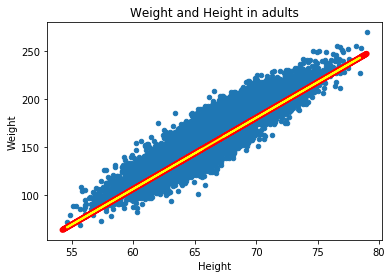

In [19]:
df.plot(kind='scatter',
       x='Height',
       y='Weight', title='Weight and Height in adults')
plt.plot(X_train, y_train_pred, color='red', linewidth=6)
plt.plot(X_test, y_test_pred, color='yellow', linewidth=2)

In [20]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [22]:
print(mse(y_train, y_train_pred))
print(mse(y_test, y_test_pred))

213.00731487853625
213.57412134449416


In [23]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.7938515597474189
0.7916654151729061
